# Voronoi diagrams
This notebook was translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/voronoi/).

It shows how to create a Voronoi diagram out of a binary image in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.216.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24183 MB
	Maximum Object Size:         6045 MB
	Max Clock Frequency:         2520 MHz
	Image Support:               Yes

## Get example data and push it to the GPU

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8, mtype=buffer)
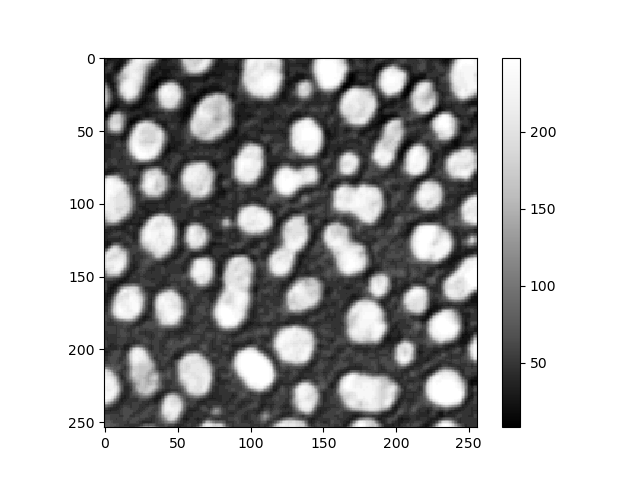
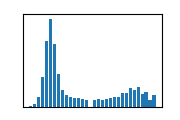

In [2]:
# load data
image = cle.asarray(imread('https://samples.fiji.sc/blobs.png').squeeze())
image

## Binarze image first

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
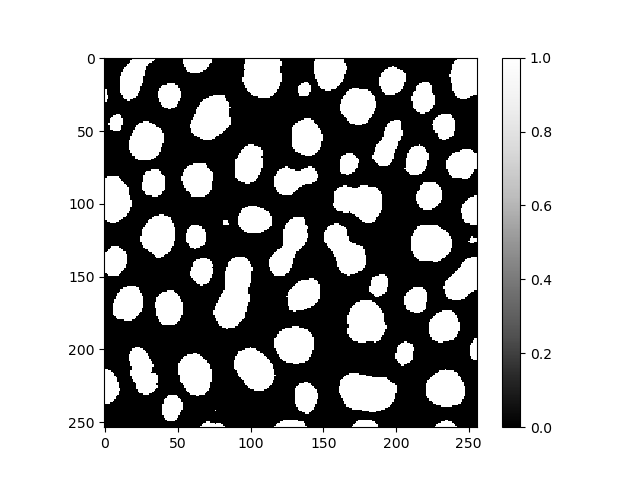
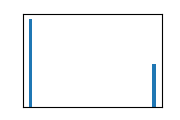

In [4]:
binary = cle.greater_constant(image, scalar=128)
binary

## Label objects and fill gaps between them

array([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       ...,
       [54, 54, 54, ..., 62, 62, 62],
       [54, 54, 54, ..., 62, 62, 62],
       [54, 54, 54, ..., 62, 62, 62]], dtype=uint32, mtype=buffer)
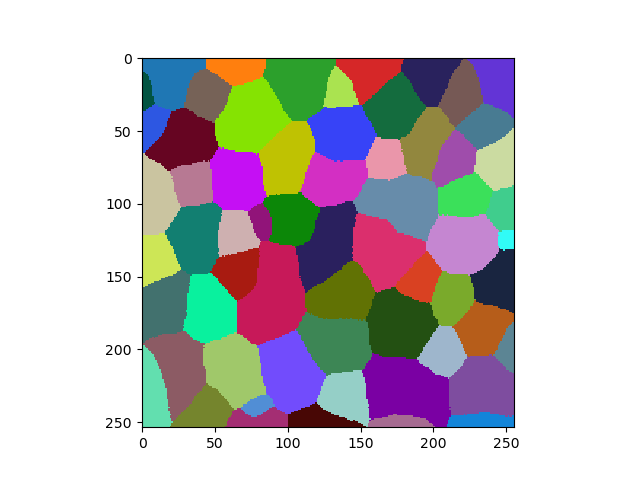

In [6]:
labels = cle.voronoi_labeling(binary)
labels

## Make binary voronoi diagram edge image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
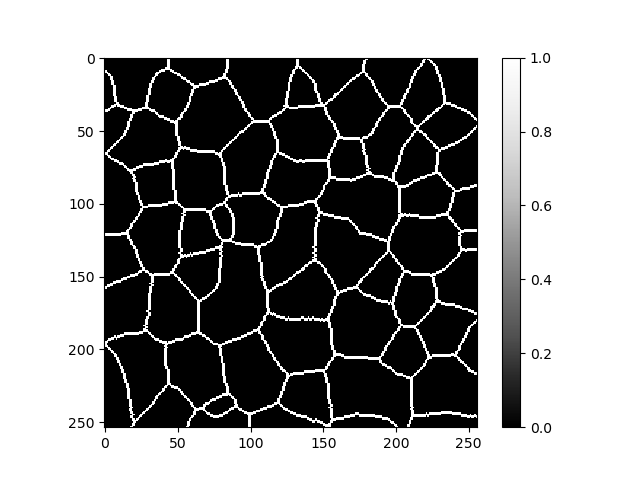
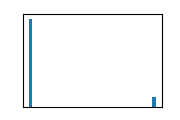

In [7]:
voronoi = cle.detect_label_edges(labels)
voronoi